In [ ]:
from pathlib import Path
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")


In [ ]:
project_root = Path.cwd().resolve()
if project_root.name == "notebooks":
    project_root = project_root.parent

data_dir = project_root / "data"
list(data_dir.glob("contract_graph_edges_cocluster_k*_range*.csv"))


[WindowsPath('C:/Users/takat/OneDrive/Documents/Programming/EKR/data/contract_graph_edges_cocluster_k120_range50-500.csv')]

In [ ]:
edges_path = data_dir / "contract_graph_edges_cocluster_k120_range50-500.csv"
edges_df = pd.read_csv(edges_path)
edges_df.head()


procedure_id             procedure_type     procedure_regime  \
0  EKR000003302020  Kbt. 115. § Nyílt eljárás  Nemzeti eljárásrend   
1  EKR000003302020  Kbt. 115. § Nyílt eljárás  Nemzeti eljárásrend   
2  EKR000003302020  Kbt. 115. § Nyílt eljárás  Nemzeti eljárásrend   
3  EKR000003302020  Kbt. 115. § Nyílt eljárás  Nemzeti eljárásrend   
4  EKR000003302020  Kbt. 115. § Nyílt eljárás  Nemzeti eljárásrend   

                           notice_type notice_date  \
0  Tájékoztató az eljárás eredményéről  2020-03-01   
1  Tájékoztató az eljárás eredményéről  2020-03-01   
2  Tájékoztató az eljárás eredményéről  2020-03-01   
3  Tájékoztató az eljárás eredményéről  2020-03-01   
4  Tájékoztató az eljárás eredményéről  2020-03-01   

                        lot_id            lot_label lot_number  \
0  EKR000003302020_3337/2020_4   Lakóház felújítása          4   
1  EKR000003302020_3337/2020_5  Csillagpont építése          5   
2  EKR000003302020_3337/2020_2      Lakóház építése          2   
3  EKR000003302020_3337/2020_1      Ikerház építése          1   
4  EKR000003302020_3337/2020_3   Lakóház felújítása          3   

                         lot_subject    cpv_main  ... estimated_value  \
0  Lakhatási körülmények fejlesztése  45211300-2  ...             NaN   
1  Lakhatási körülmények fejlesztése  45211300-2  ...             NaN   
2  Lakhatási körülmények fejlesztése  45211300-2  ...             NaN   
3  Lakhatási körülmények fejlesztése  45211300-2  ...             NaN   
4  Lakhatási körülmények fejlesztése  45211300-2  ...             NaN   

  estimated_currency  final_value final_currency  \
0                NaN  122990964.0            HUF   
1                NaN  122990964.0            HUF   
2                NaN  122990964.0            HUF   
3                NaN  122990964.0            HUF   
4                NaN  122990964.0            HUF   

                                   buyer_node  \
0  buyer::Somogyszentpál Község Önkormányzata   
1  buyer::Somogyszentpál Község Önkormányzata   
2  buyer::Somogyszentpál Község Önkormányzata   
3  buyer::Somogyszentpál Község Önkormányzata   
4  buyer::Somogyszentpál Község Önkormányzata   

                                       winner_node   buyer_cluster  \
0  winner::KÁL-MÁRK Korlátolt Felelősségű Társaság  cocluster_0010   
1  winner::KÁL-MÁRK Korlátolt Felelősségű Társaság  cocluster_0010   
2  winner::KÁL-MÁRK Korlátolt Felelősségű Társaság  cocluster_0010   
3  winner::KÁL-MÁRK Korlátolt Felelősségű Társaság  cocluster_0010   
4  winner::KÁL-MÁRK Korlátolt Felelősségű Társaság  cocluster_0010   

   winner_cluster buyer_cluster_size winner_cluster_size  
0  cocluster_0010               78.0                78.0  
1  cocluster_0010               78.0                78.0  
2  cocluster_0010               78.0                78.0  
3  cocluster_0010               78.0                78.0  
4  cocluster_0010               78.0                78.0  

[5 rows x 22 columns]

In [ ]:
value_cols = [
    col for col in edges_df.columns if col.lower().startswith("final")
]
value_cols


['final_value', 'final_currency']

In [ ]:
numeric_cols = edges_df.select_dtypes(include="number").columns.tolist()
numeric_cols


['estimated_value', 'final_value', 'buyer_cluster_size', 'winner_cluster_size']

In [ ]:
value_cols = [
    col
    for col in ["final_value", "final_value_numeric", "final_value_huf", "award_value_numeric", "award_value_huf"]
    if col in edges_df.columns
]
value_cols


['final_value']

In [ ]:
edges_df[value_cols].describe(percentiles=[0.25, 0.5, 0.75])


final_value
count  5.696000e+03
mean   3.746077e+09
std    7.690424e+09
min    9.600000e+01
25%    7.628062e+07
50%    2.982982e+08
75%    1.778209e+09
max    7.500000e+10

In [ ]:
value_col = "final_value_huf" if "final_value_huf" in edges_df.columns else value_cols[0]
value_col


'final_value'

C:\Users\takat\AppData\Local\Temp\ipykernel_31728\3259392814.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\takat\AppData\Local\Temp\ipykernel_31728\3259392814.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


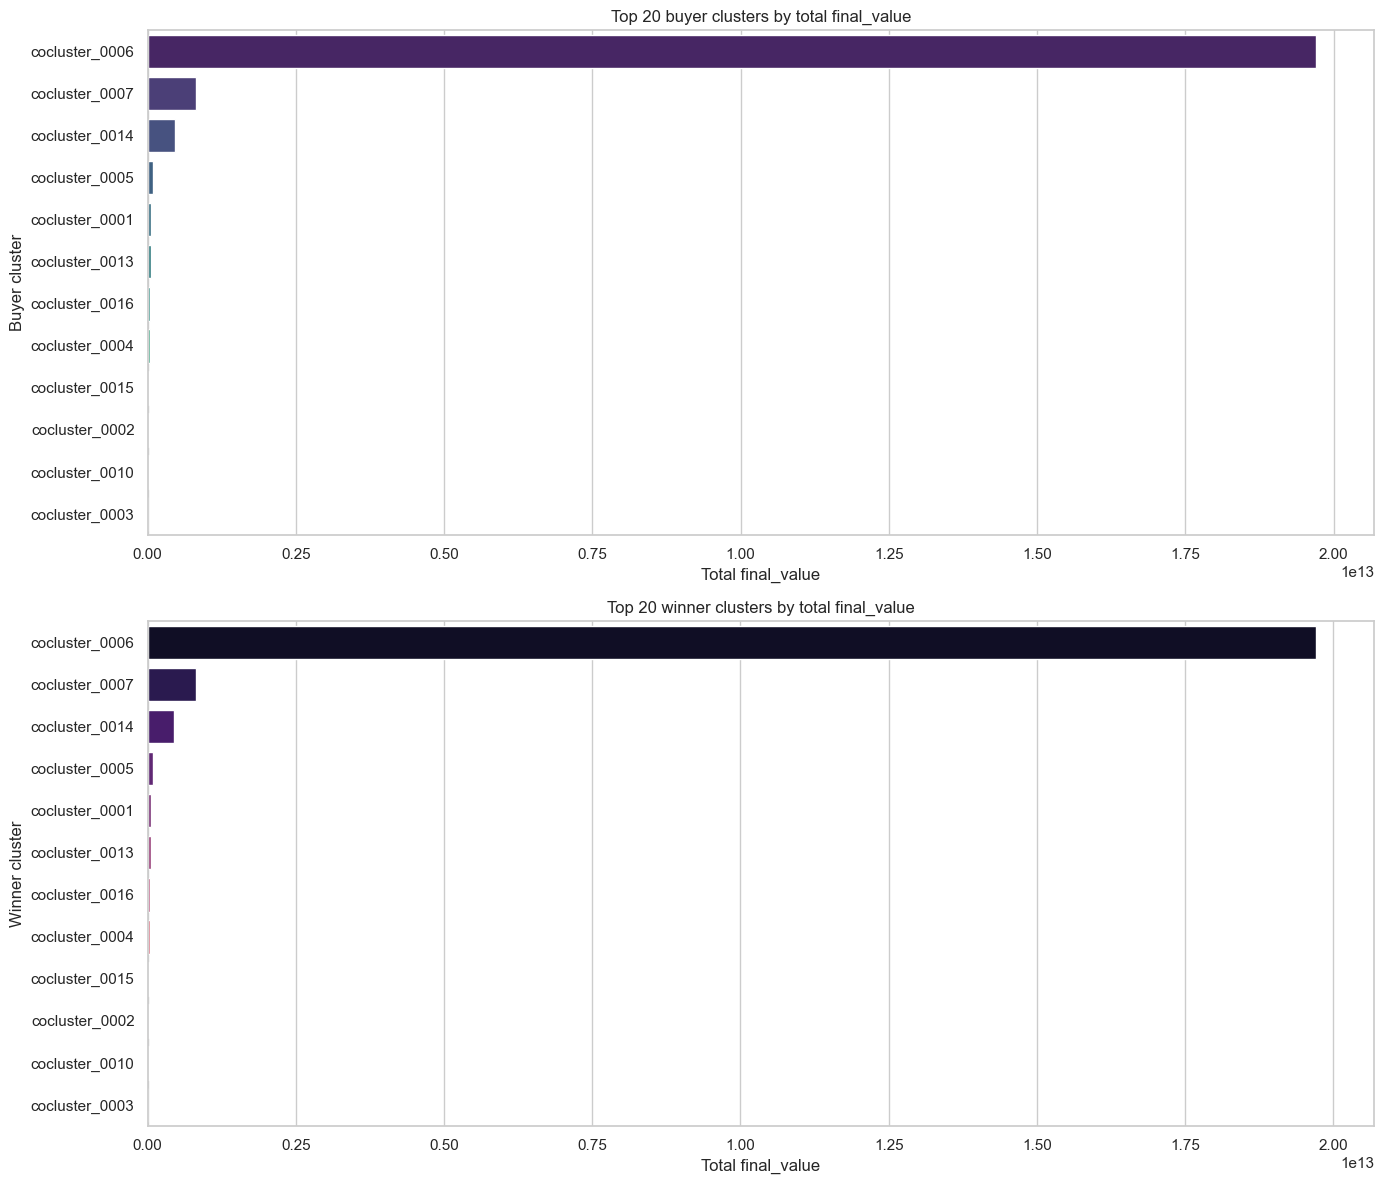

In [ ]:
top_n = 20

buyer_totals = (
    edges_df.dropna(subset=[value_col])
    .groupby("buyer_cluster", as_index=False)[value_col]
    .sum()
    .sort_values(value_col, ascending=False)
)

winner_totals = (
    edges_df.dropna(subset=[value_col])
    .groupby("winner_cluster", as_index=False)[value_col]
    .sum()
    .sort_values(value_col, ascending=False)
)

fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=False)

sns.barplot(
    data=buyer_totals.head(top_n),
    x=value_col,
    y="buyer_cluster",
    ax=axes[0],
    palette="viridis",
    orient="h",
)
axes[0].set_title(f"Top {top_n} buyer clusters by total {value_col}")
axes[0].set_xlabel(f"Total {value_col}")
axes[0].set_ylabel("Buyer cluster")

sns.barplot(
    data=winner_totals.head(top_n),
    x=value_col,
    y="winner_cluster",
    ax=axes[1],
    palette="magma",
    orient="h",
)
axes[1].set_title(f"Top {top_n} winner clusters by total {value_col}")
axes[1].set_xlabel(f"Total {value_col}")
axes[1].set_ylabel("Winner cluster")

plt.tight_layout()
plt.show()



C:\Users\takat\AppData\Local\Temp\ipykernel_31728\3289988687.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


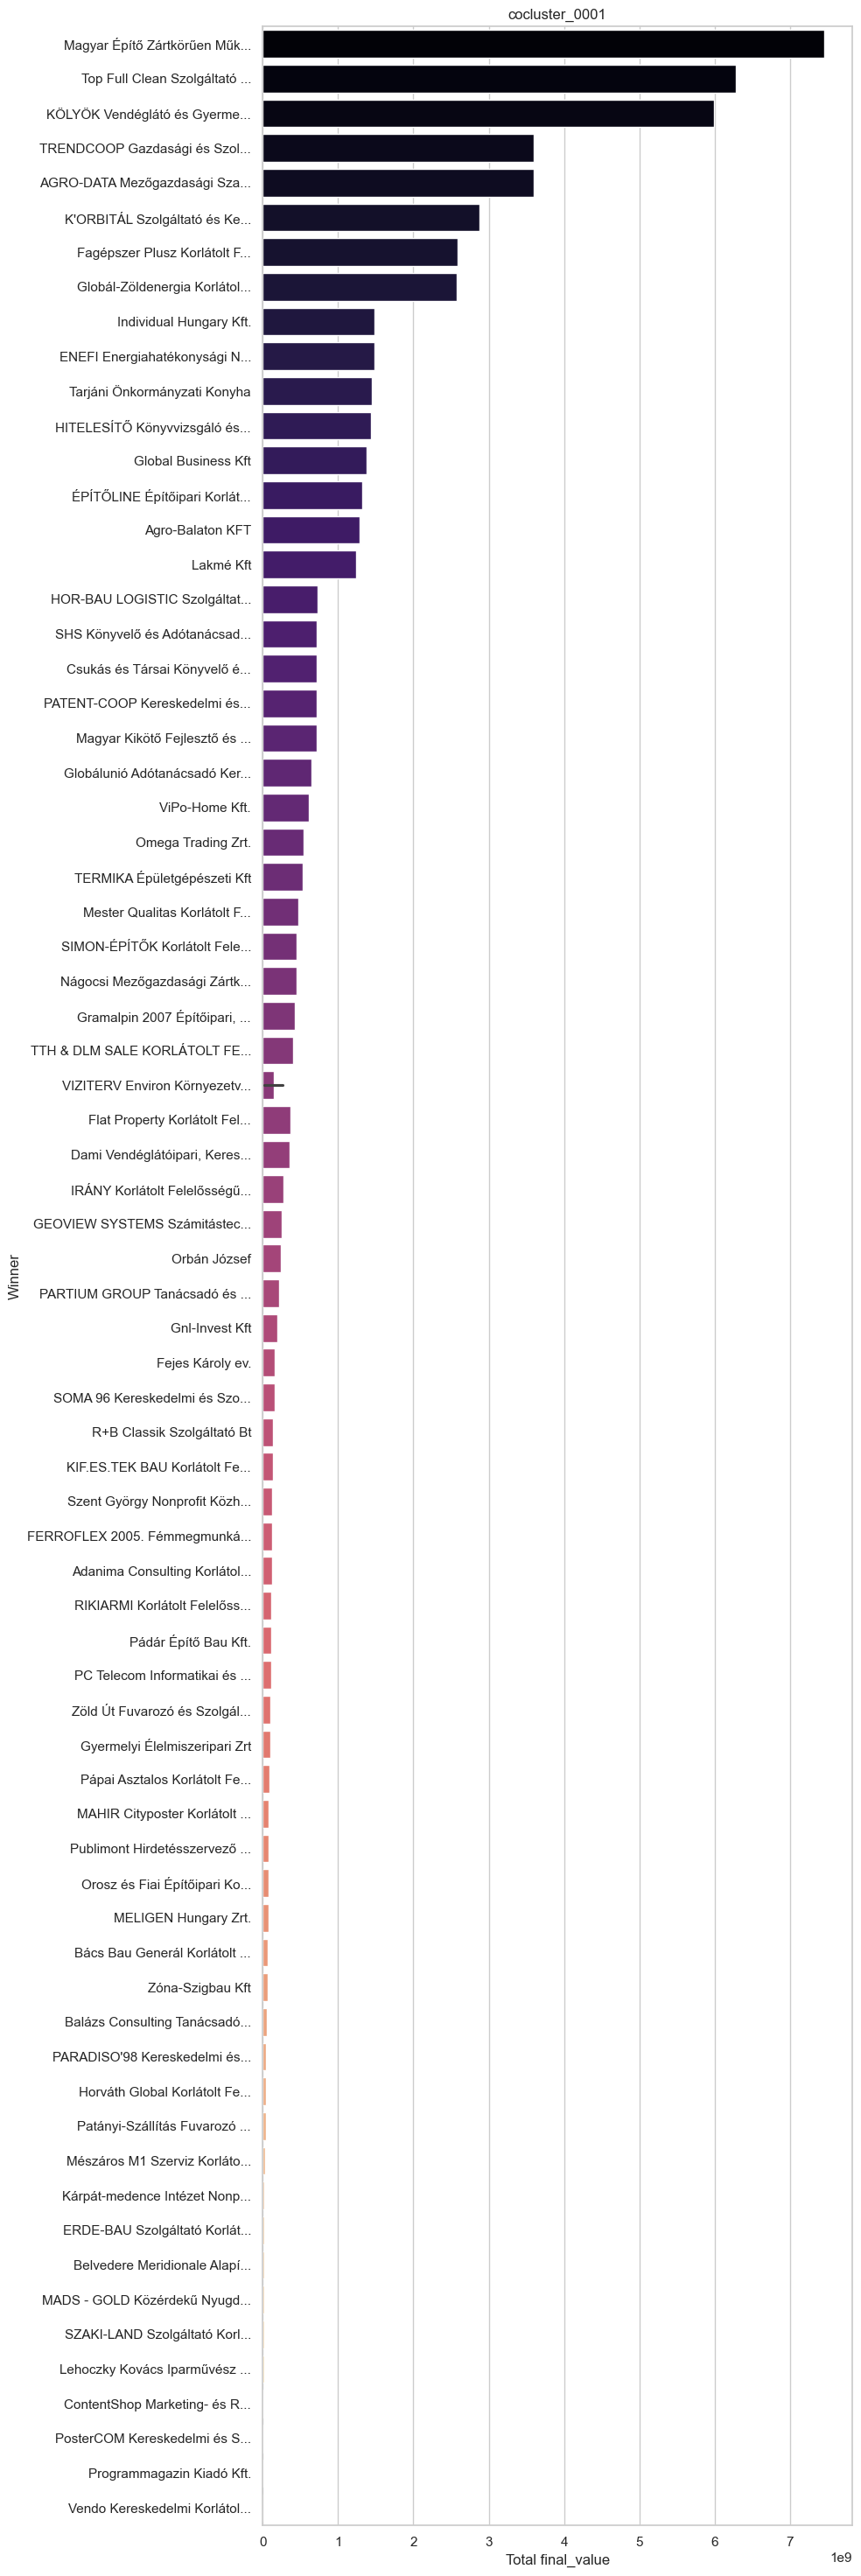

C:\Users\takat\AppData\Local\Temp\ipykernel_31728\3289988687.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


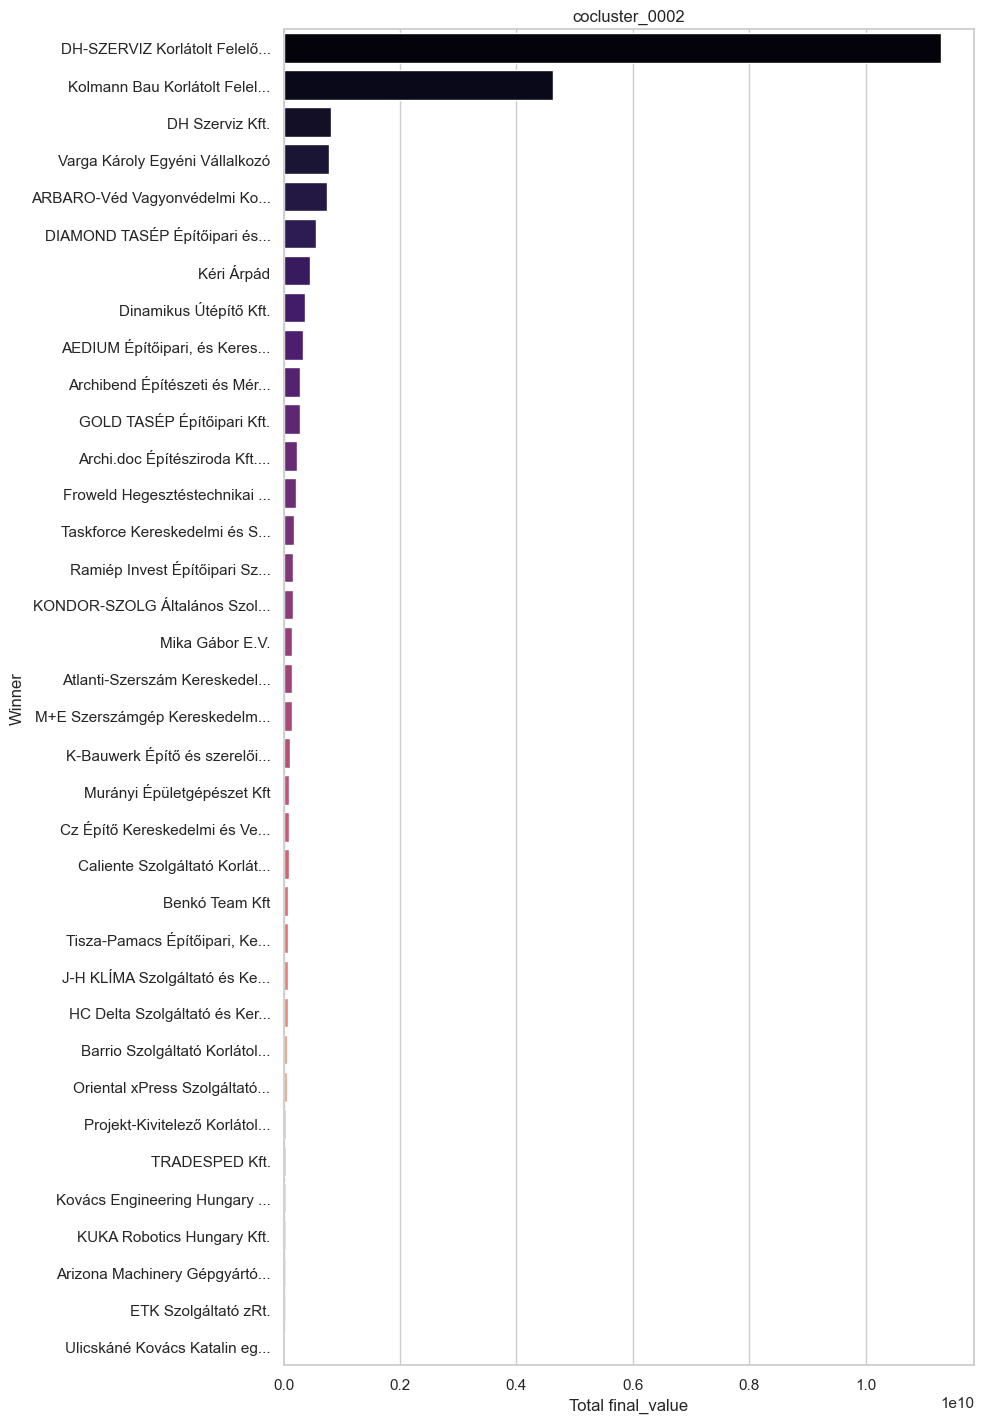

C:\Users\takat\AppData\Local\Temp\ipykernel_31728\3289988687.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


C:\Users\takat\AppData\Local\Temp\ipykernel_31728\3289988687.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


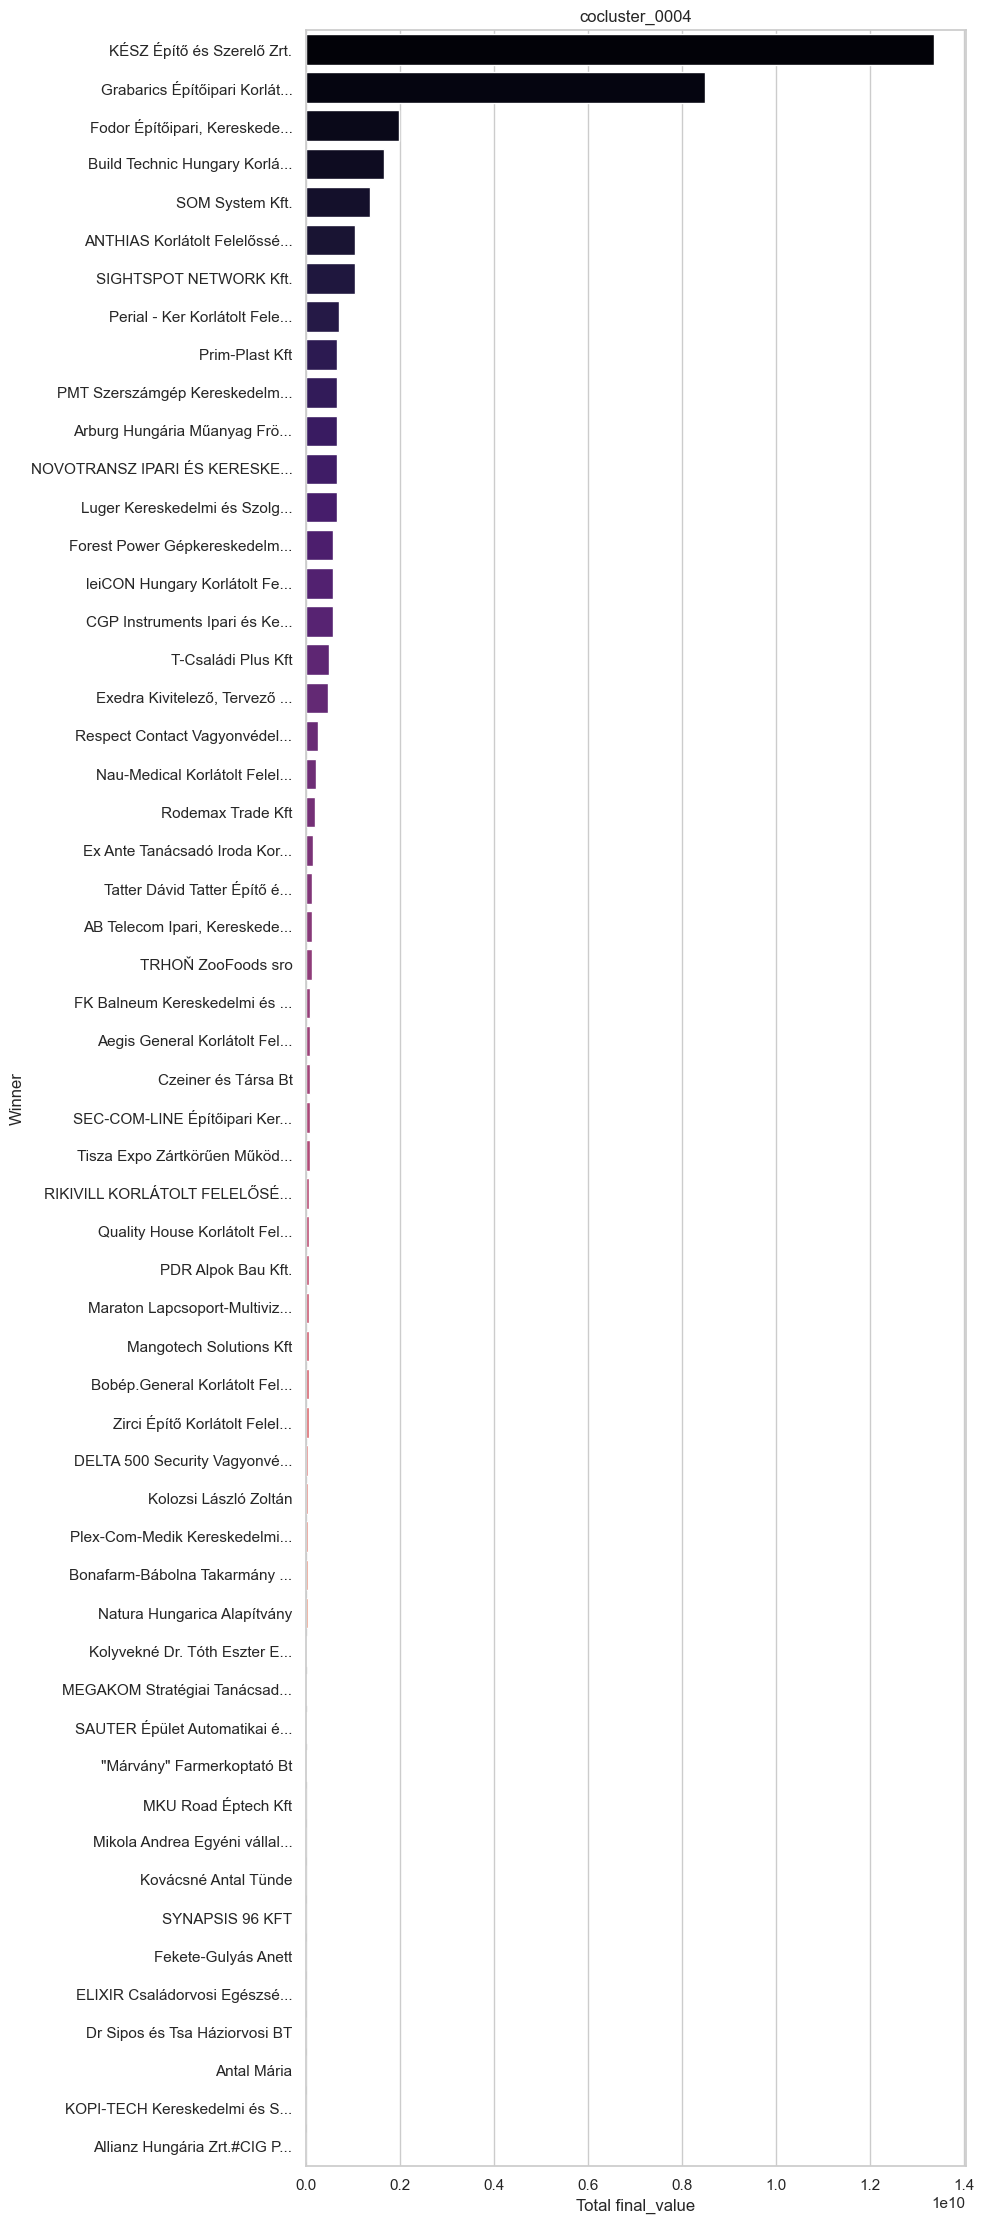

C:\Users\takat\AppData\Local\Temp\ipykernel_31728\3289988687.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\takat\AppData\Local\Temp\ipykernel_31728\3289988687.py:51: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\takat\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


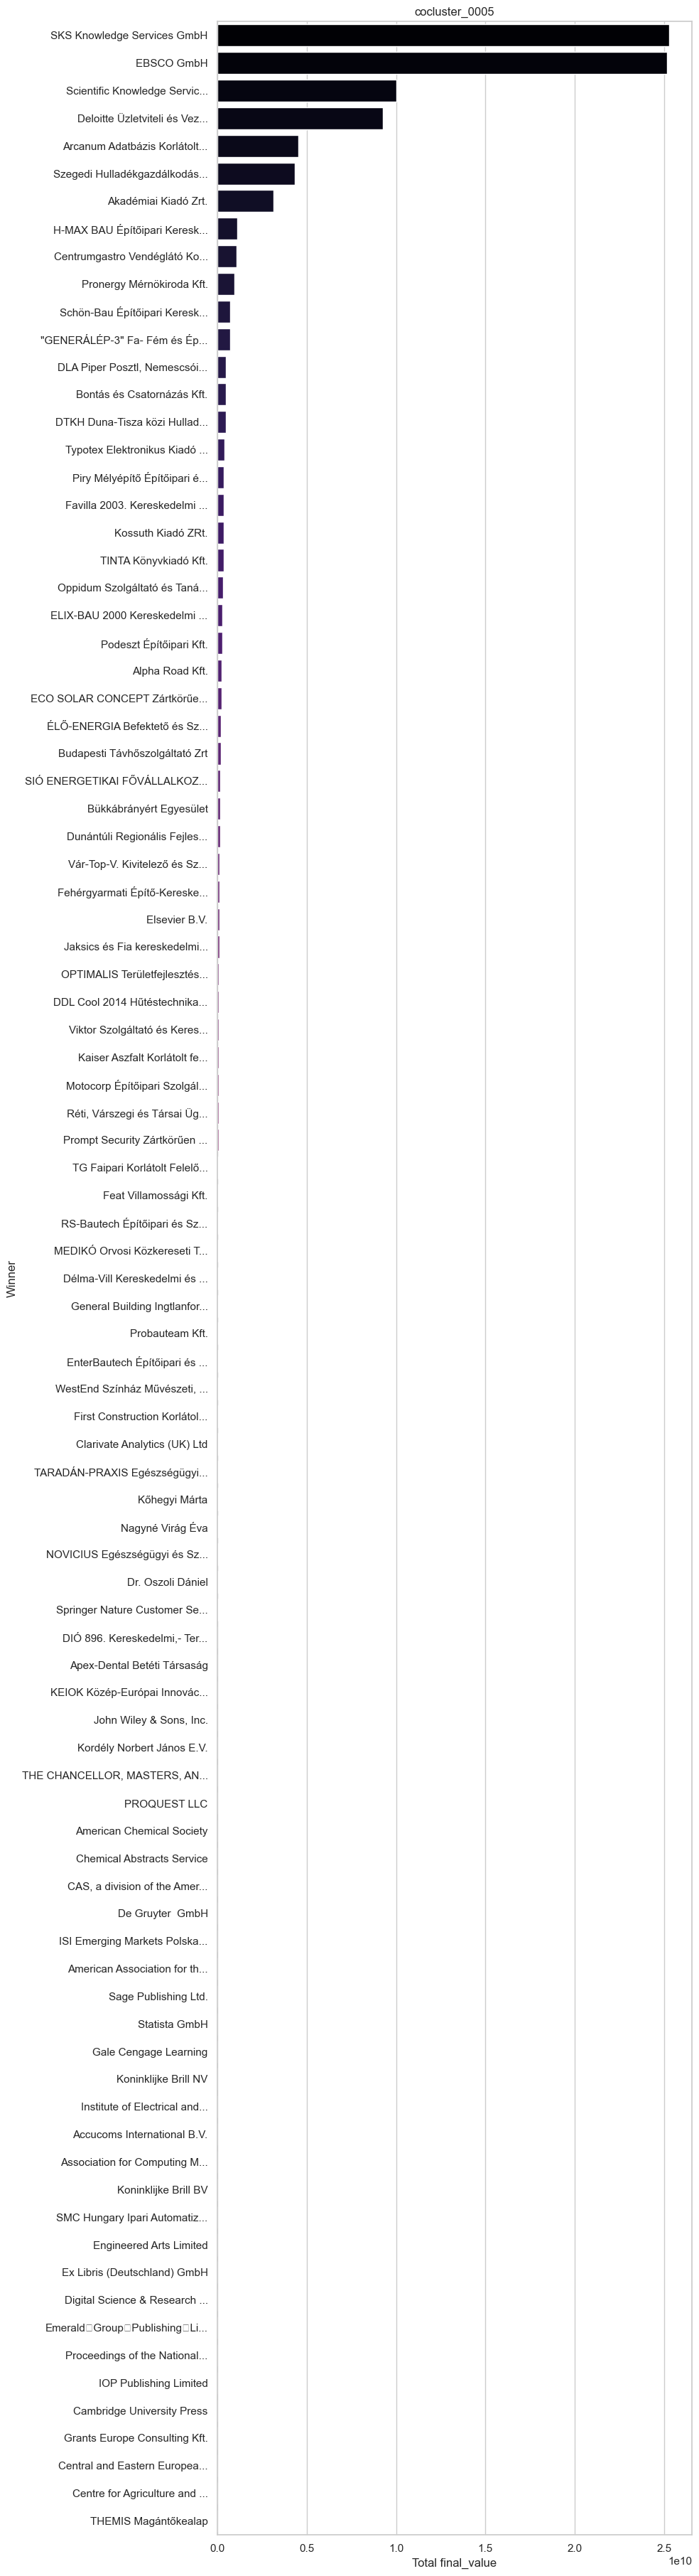

C:\Users\takat\AppData\Local\Temp\ipykernel_31728\3289988687.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


C:\Users\takat\AppData\Local\Temp\ipykernel_31728\3289988687.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


C:\Users\takat\AppData\Local\Temp\ipykernel_31728\3289988687.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


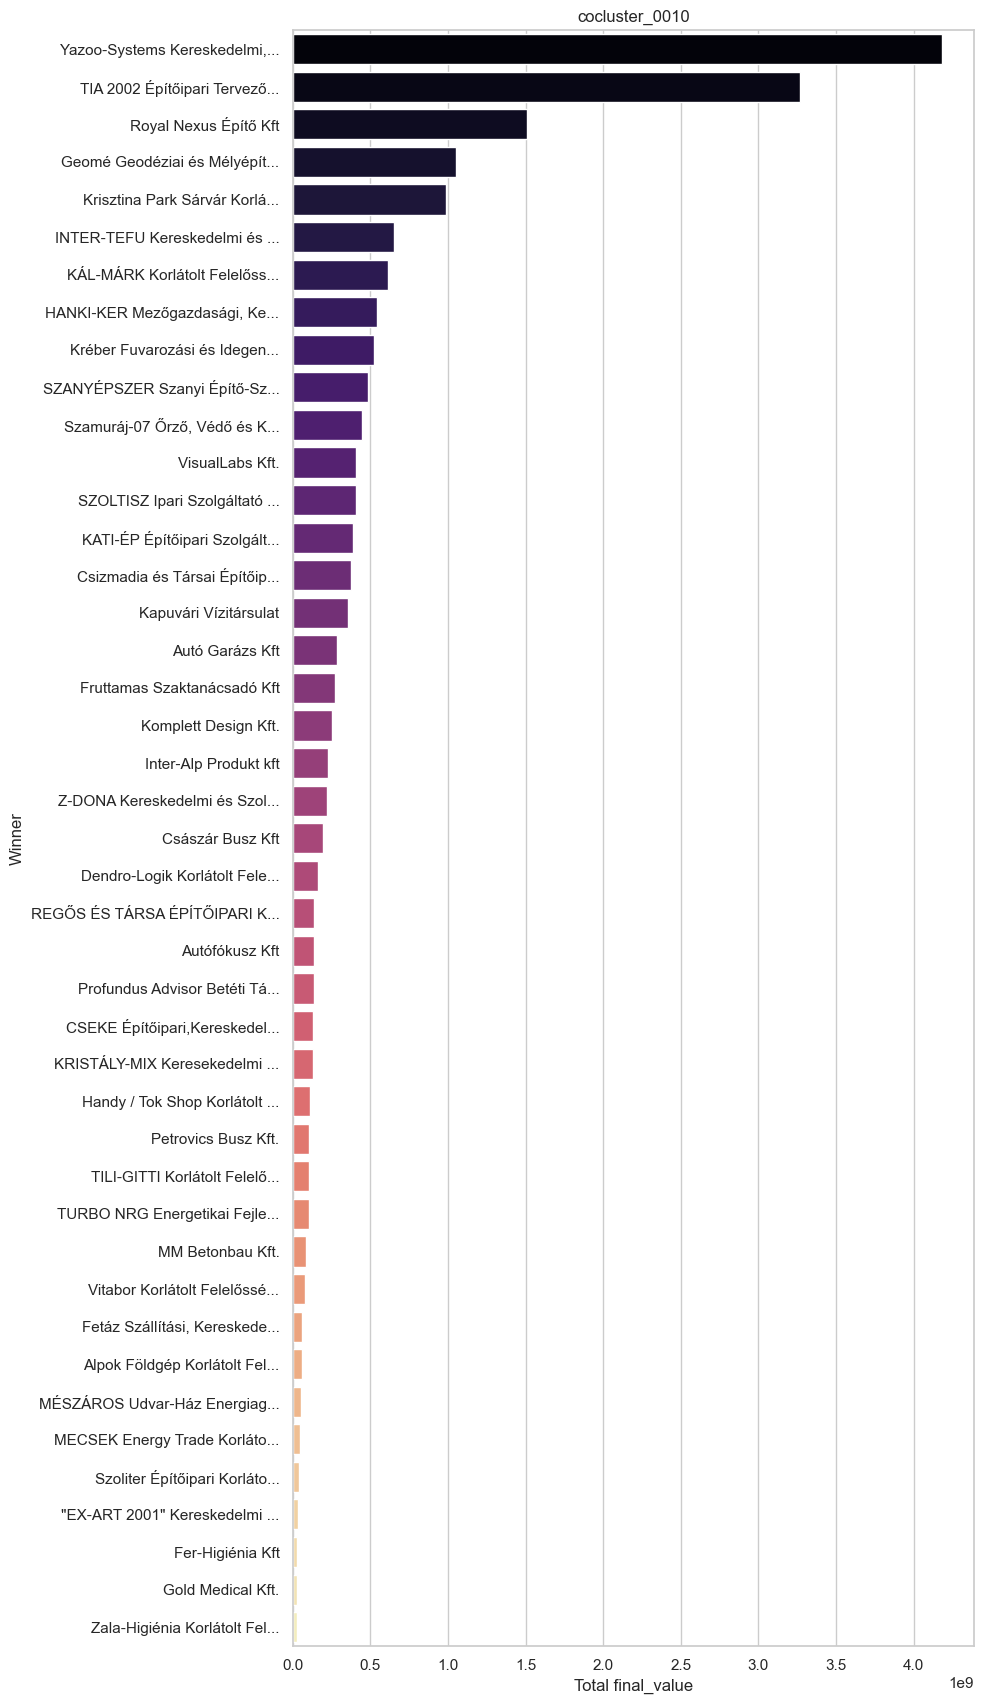

C:\Users\takat\AppData\Local\Temp\ipykernel_31728\3289988687.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


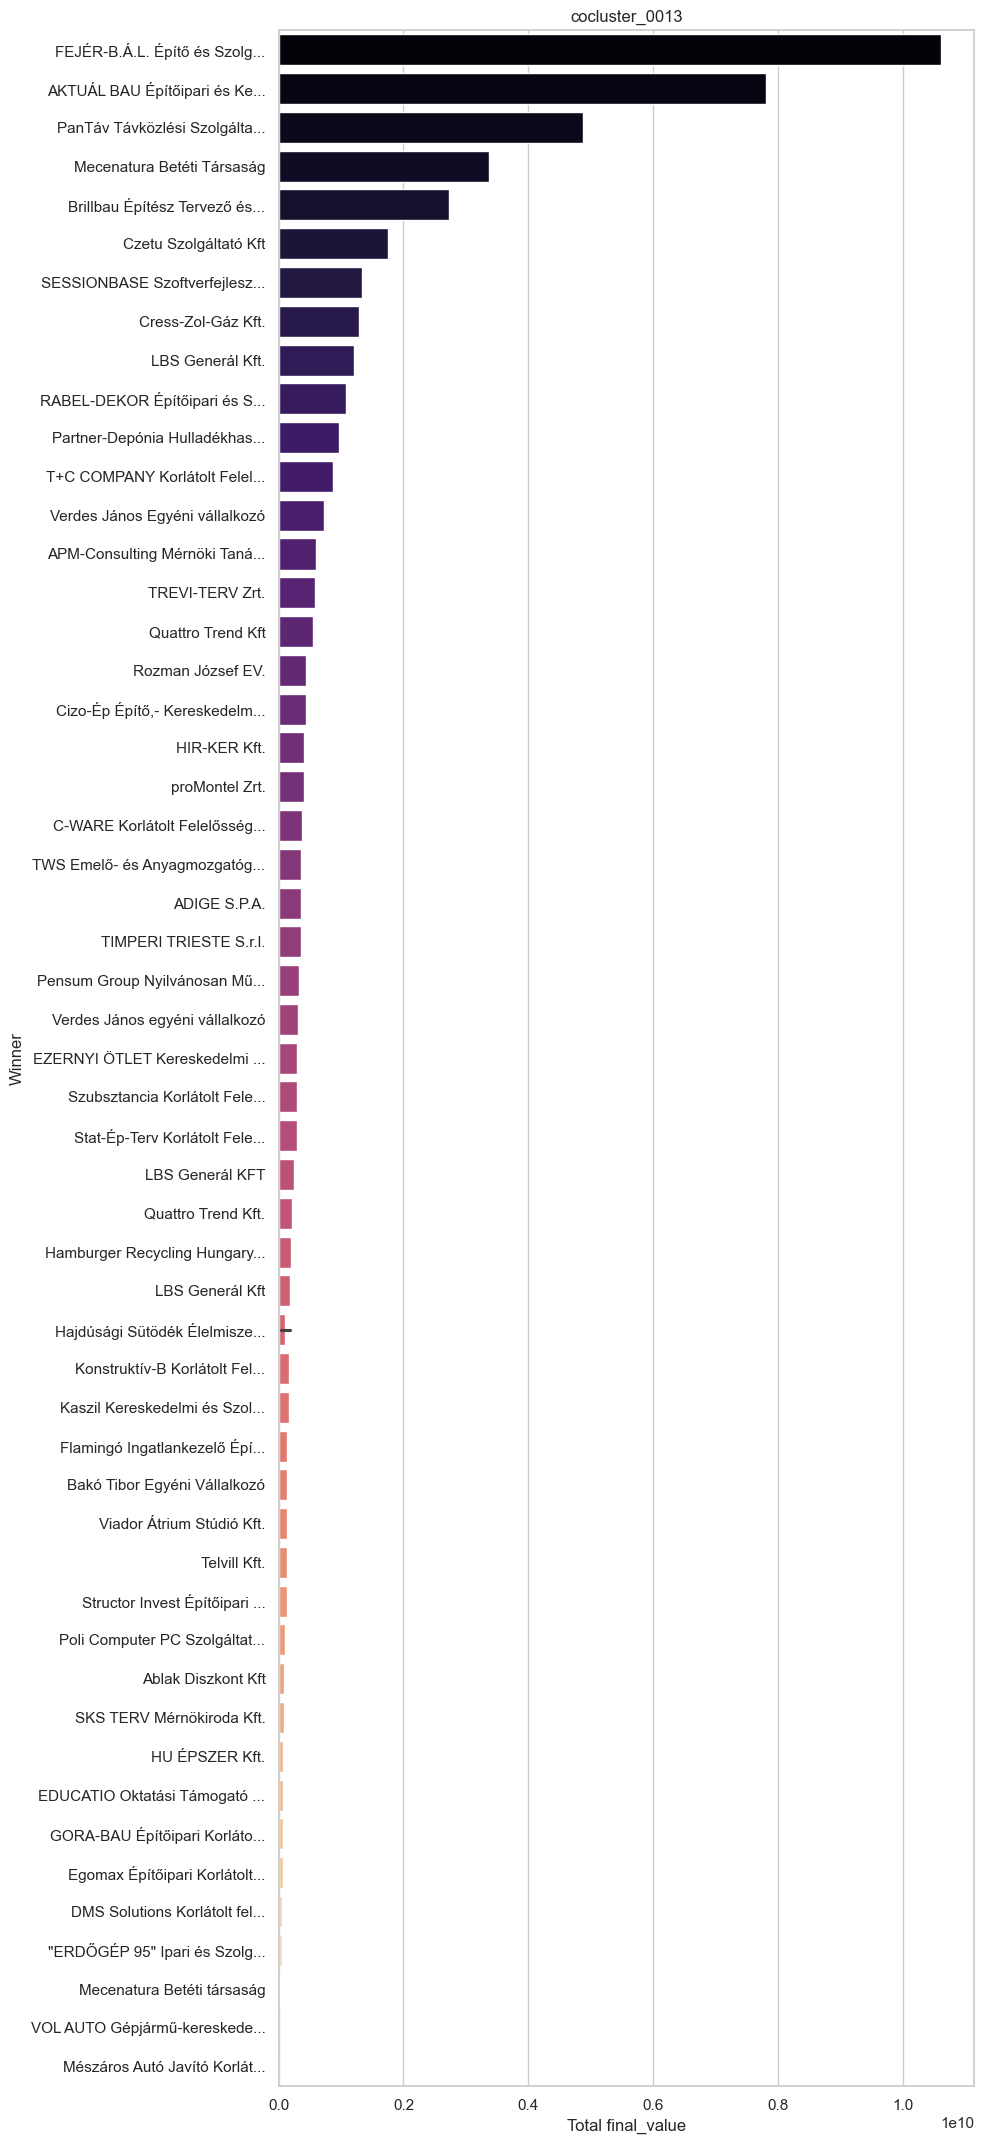

C:\Users\takat\AppData\Local\Temp\ipykernel_31728\3289988687.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


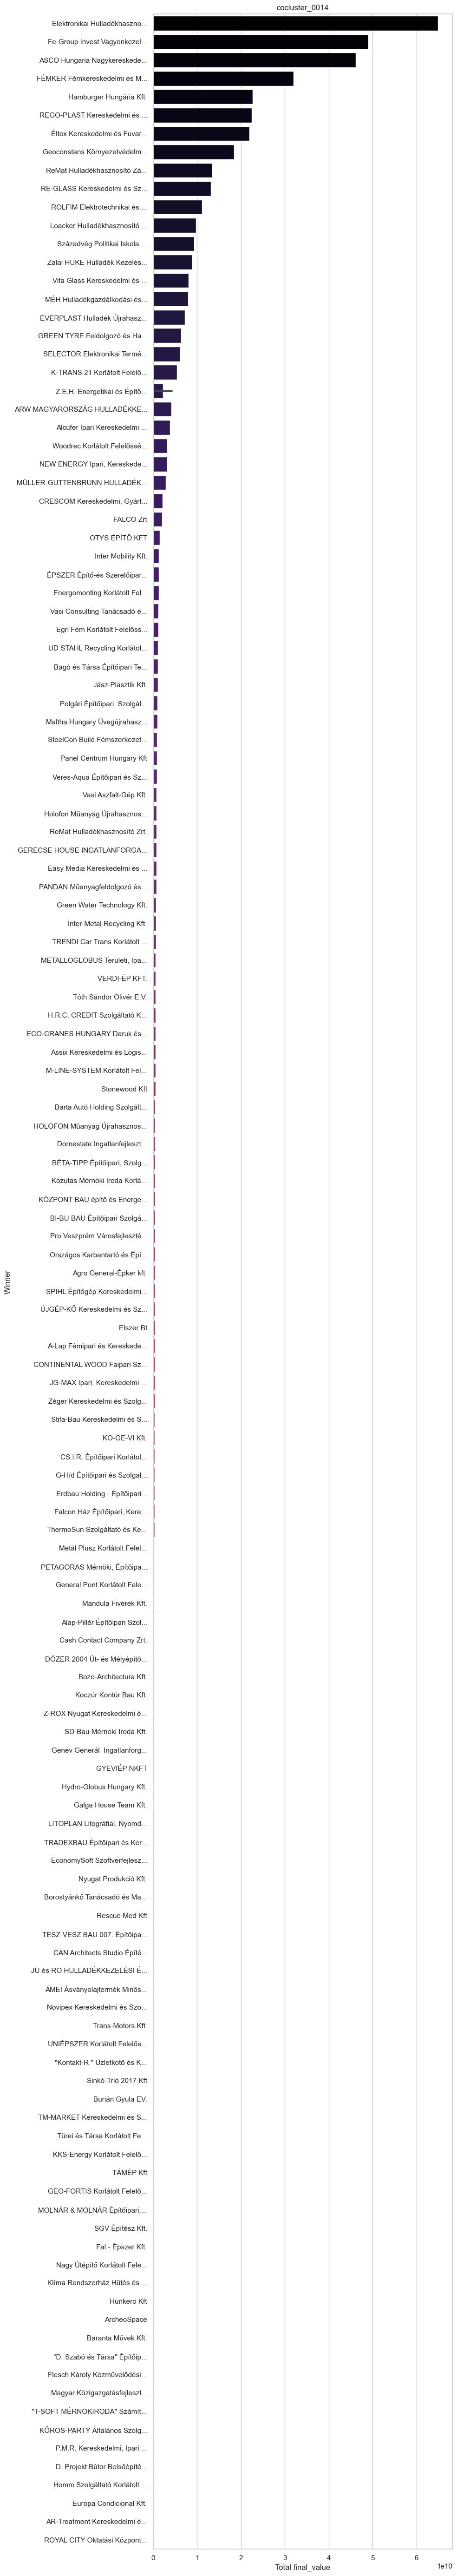

C:\Users\takat\AppData\Local\Temp\ipykernel_31728\3289988687.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


C:\Users\takat\AppData\Local\Temp\ipykernel_31728\3289988687.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


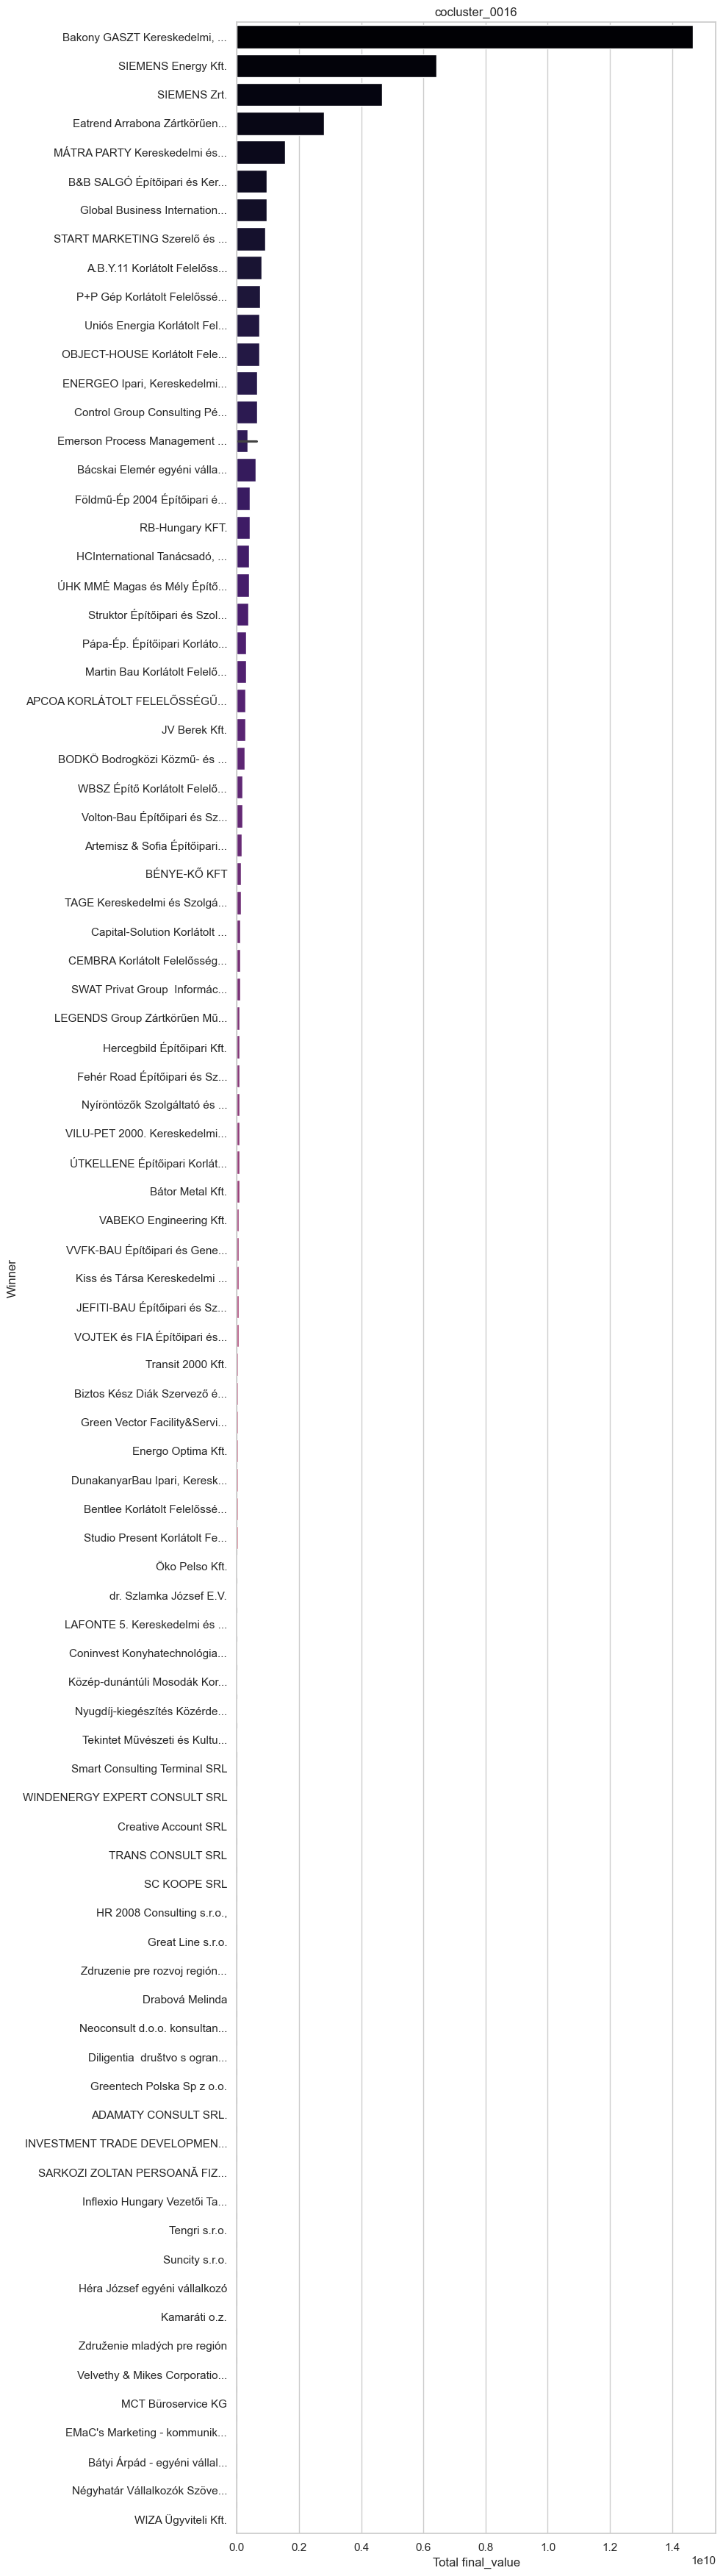

In [ ]:
winners_by_cluster = (
    edges_df.dropna(subset=[value_col])
    .groupby(["winner_cluster", "winner_node"], as_index=False)[value_col]
    .sum()
)

clusters_to_plot = sorted(winners_by_cluster["winner_cluster"].unique())
max_winners_per_cluster = None
label_max_chars = 30

for cluster in clusters_to_plot:
    cluster_data = (
        winners_by_cluster[winners_by_cluster["winner_cluster"] == cluster]
        .sort_values(value_col, ascending=False)
        .pipe(
            lambda df_: df_.head(max_winners_per_cluster)
            if max_winners_per_cluster is not None
            else df_
        )
        .assign(
            winner_label=lambda df_: df_["winner_node"].str.replace(
                r"^winner::", "", regex=True
            ).apply(
                lambda name: name
                if len(name) <= label_max_chars
                else name[: label_max_chars - 3] + "..."
            )
        )
        .reset_index(drop=True)
    )

    if cluster_data.empty:
        continue

    height = max(4, 0.4 * len(cluster_data))
    fig, ax = plt.subplots(figsize=(10, height))

    sns.barplot(
        data=cluster_data,
        x=value_col,
        y="winner_label",
        ax=ax,
        orient="h",
        palette="magma",
    )

    ax.set_title(f"{cluster}")
    ax.set_xlabel(f"Total {value_col}")
    ax.set_ylabel("Winner")

    plt.tight_layout()
    plt.show()



In [ ]:
def gini_coefficient(values: np.ndarray) -> float:
    arr = np.asarray(values, dtype=float)
    arr = arr[np.isfinite(arr)]
    if arr.size == 0:
        return np.nan
    if np.all(arr == 0):
        return 0.0
    arr.sort()
    n = arr.size
    index = np.arange(1, n + 1)
    return (2.0 * np.dot(index, arr) / (n * arr.sum())) - (n + 1) / n

cluster_value_df = edges_df.dropna(subset=[value_col])

buyer_gini = (
    cluster_value_df.groupby("buyer_cluster")
    .agg(
        total_value=(value_col, "sum"),
        award_count=(value_col, "count"),
        gini=(value_col, lambda x: gini_coefficient(x.values)),
    )
    .reset_index()
    .sort_values("gini", ascending=False)
)

winner_gini = (
    cluster_value_df.groupby("winner_cluster")
    .agg(
        total_value=(value_col, "sum"),
        award_count=(value_col, "count"),
        gini=(value_col, lambda x: gini_coefficient(x.values)),
    )
    .reset_index()
    .sort_values("gini", ascending=False)
)

buyer_gini.head()



buyer_cluster   total_value  award_count      gini
3   cocluster_0004  3.866390e+10          116  0.811970
11  cocluster_0016  4.332336e+10          235  0.799789
10  cocluster_0015  2.991919e+10          184  0.766967
8   cocluster_0013  4.756672e+10          240  0.720055
6   cocluster_0007  8.201337e+11          358  0.714404

C:\Users\takat\AppData\Local\Temp\ipykernel_31728\4268635002.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\takat\AppData\Local\Temp\ipykernel_31728\4268635002.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


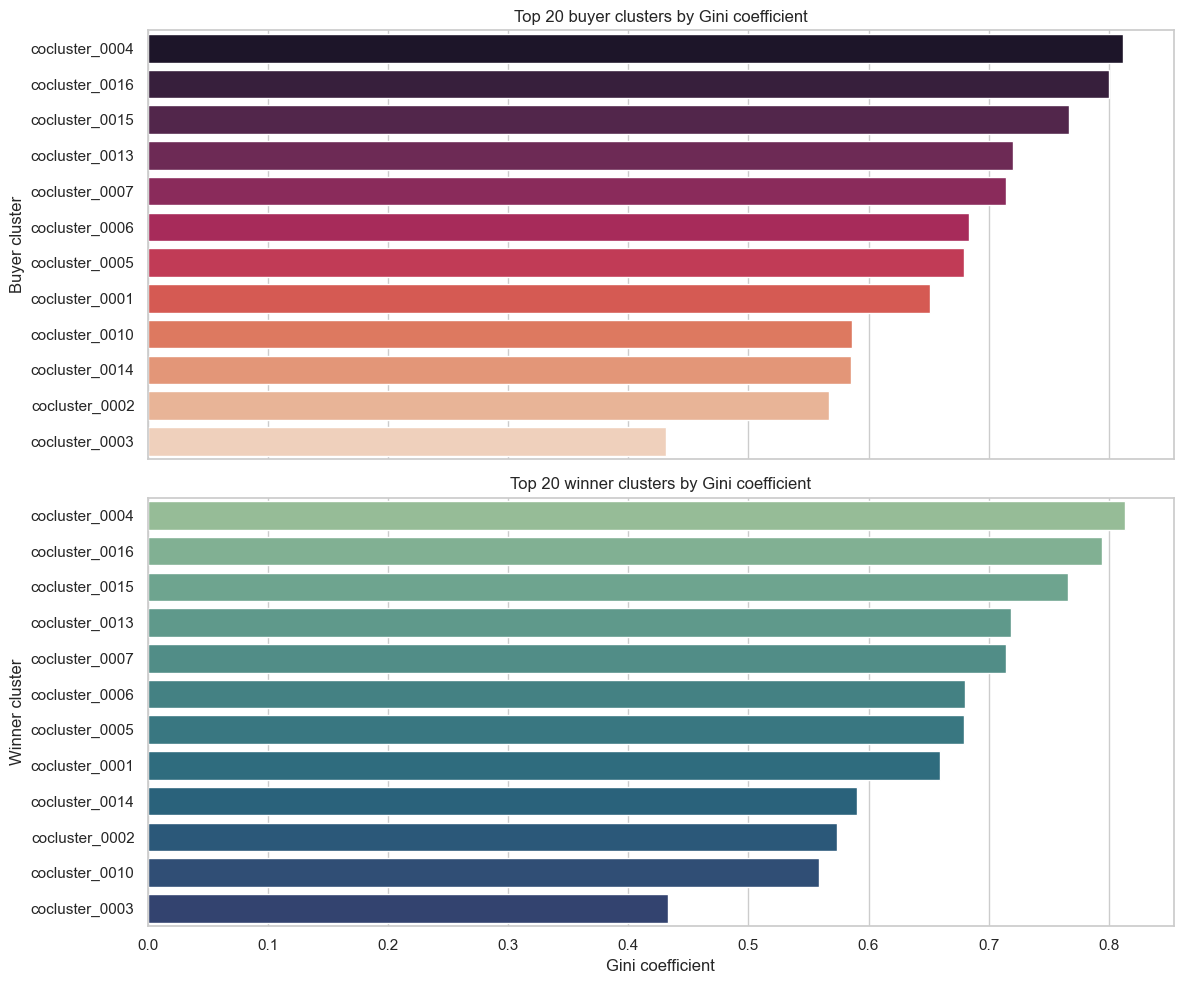

winner_cluster   total_value  award_count      gini
3   cocluster_0004  3.837965e+10          112  0.813610
11  cocluster_0016  4.438739e+10          239  0.794672
10  cocluster_0015  3.002263e+10          186  0.765839
8   cocluster_0013  4.778416e+10          243  0.718226
6   cocluster_0007  8.201337e+11          358  0.714404

In [ ]:
top_n = 20

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

sns.barplot(
    data=buyer_gini.head(top_n),
    x="gini",
    y="buyer_cluster",
    ax=axes[0],
    palette="rocket",
    orient="h",
)
axes[0].set_title(f"Top {top_n} buyer clusters by Gini coefficient")
axes[0].set_xlabel("Gini coefficient")
axes[0].set_ylabel("Buyer cluster")

sns.barplot(
    data=winner_gini.head(top_n),
    x="gini",
    y="winner_cluster",
    ax=axes[1],
    palette="crest",
    orient="h",
)
axes[1].set_title(f"Top {top_n} winner clusters by Gini coefficient")
axes[1].set_xlabel("Gini coefficient")
axes[1].set_ylabel("Winner cluster")

plt.tight_layout()
plt.show()

buyer_gini.head()
winner_gini.head()



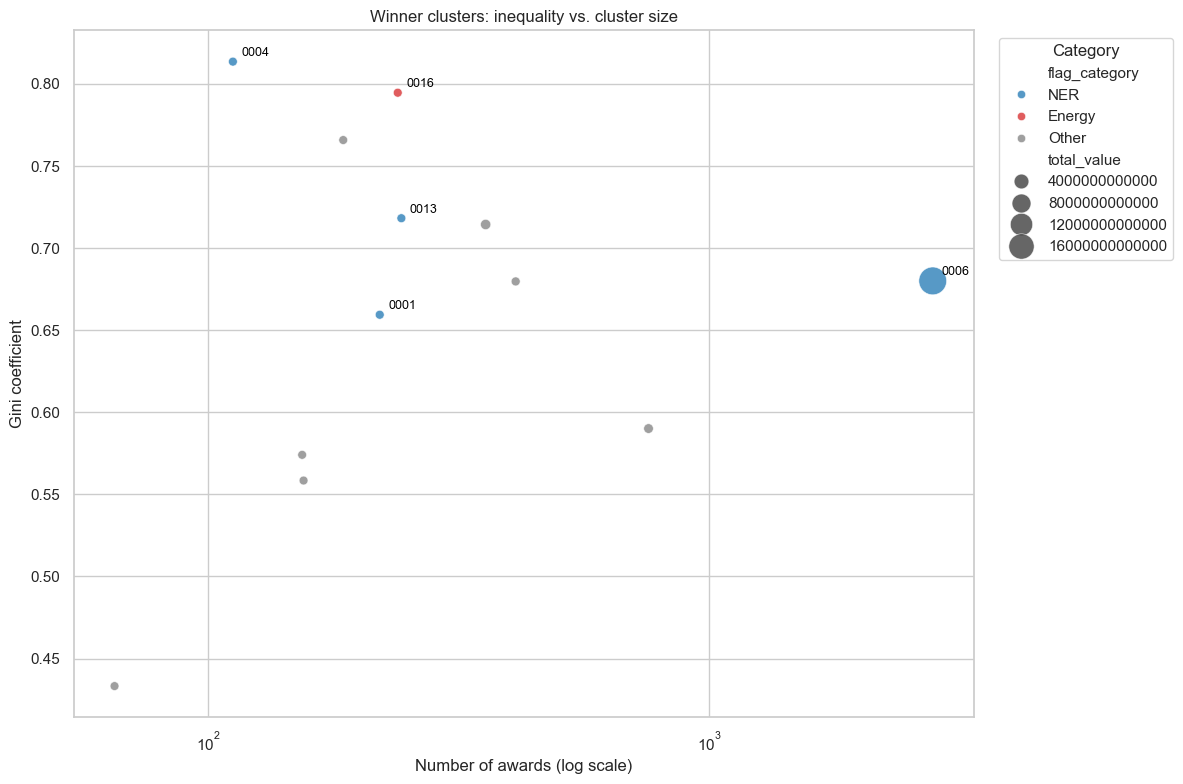

winner_cluster flag_category  award_count   total_value      gini
3   cocluster_0004           NER          112  3.837965e+10  0.813610
11  cocluster_0016        Energy          239  4.438739e+10  0.794672
8   cocluster_0013           NER          243  4.778416e+10  0.718226
5   cocluster_0006           NER         2796  1.970236e+13  0.680035
0   cocluster_0001           NER          220  5.899374e+10  0.659417

In [ ]:
energy_clusters = {"cocluster_0016": "Energy"}
ner_clusters = {
    "cocluster_0013": "NER",
    "cocluster_0006": "NER",
    "cocluster_0004": "NER",
    "cocluster_0001": "NER",
}
flag_labels = {**energy_clusters, **ner_clusters}

winner_plot_df = winner_gini.assign(
    flag_category=winner_gini["winner_cluster"].map(flag_labels).fillna("Other"),
    award_count_log=lambda df_: np.log10(df_["award_count"].clip(lower=1)),
)

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=winner_plot_df,
    x="award_count",
    y="gini",
    hue="flag_category",
    size="total_value",
    palette={"Energy": "#d62728", "NER": "#1f77b4", "Other": "#7f7f7f"},
    sizes=(40, 400),
    alpha=0.75,
)

plt.xscale("log")
plt.xlabel("Number of awards (log scale)")
plt.ylabel("Gini coefficient")
plt.title("Winner clusters: inequality vs. cluster size")
plt.legend(title="Category", bbox_to_anchor=(1.02, 1), loc="upper left")

for _, row in winner_plot_df[winner_plot_df["flag_category"] != "Other"].iterrows():
    plt.annotate(
        row["winner_cluster"].replace("cocluster_", ""),
        (row["award_count"], row["gini"]),
        textcoords="offset points",
        xytext=(6, 4),
        fontsize=9,
        color="black",
    )

plt.tight_layout()
plt.show()

winner_plot_df[winner_plot_df["flag_category"] != "Other"][[
    "winner_cluster",
    "flag_category",
    "award_count",
    "total_value",
    "gini",
]].sort_values("gini", ascending=False)



In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=edges_df,
    x="buyer_cluster",
    y=value_col,
    showfliers=False,
)
plt.xticks(rotation=90)
plt.yscale("log")
plt.xlabel("Buyer cluster")
plt.ylabel(f"{value_col} (log scale)")
plt.title(f"Distribution of {value_col} by buyer cluster")
plt.tight_layout()
if edges_df[value_col].le(0).any():
    plt.text(
        0.99,
        0.01,
        "Note: non-positive values hidden due to log scale",
        ha="right",
        va="bottom",
        fontsize=9,
        transform=plt.gca().transAxes,
    )
plt.show()


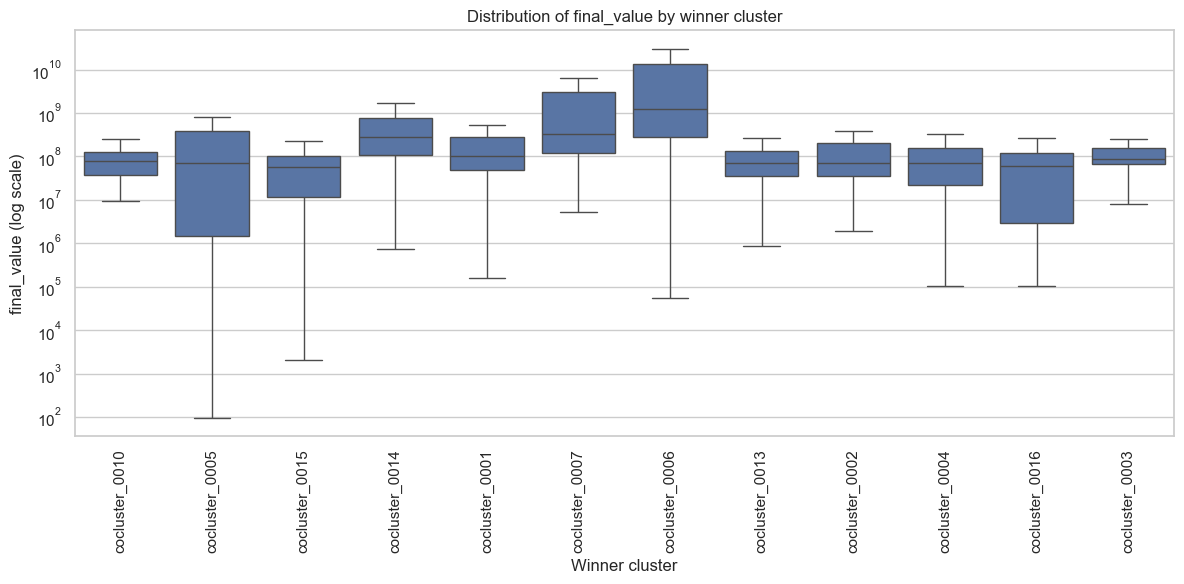

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=edges_df,
    x="winner_cluster",
    y=value_col,
    showfliers=False,
)
plt.xticks(rotation=90)
plt.yscale("log")
plt.xlabel("Winner cluster")
plt.ylabel(f"{value_col} (log scale)")
plt.title(f"Distribution of {value_col} by winner cluster")
plt.tight_layout()
if edges_df[value_col].le(0).any():
    plt.text(
        0.99,
        0.01,
        "Note: non-positive values hidden due to log scale",
        ha="right",
        va="bottom",
        fontsize=9,
        transform=plt.gca().transAxes,
    )
plt.show()
